In [1]:
import pandas as pd
pd.set_option('max_columns', 0)
import numpy as np

import datetime
from time import strftime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload

In [3]:
%reload_ext autoreload

In [4]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 110527 rows and 14 columns.


# Data Understanding:

I want to break down what data is in each column and then take a look at the categorical data to get an idea of what encoding I will need to do.

In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

- scheduled: day patient scheduled appointment
- appointment date: day appt is scheduled for
- neighborhood: dr or place of appointment
- scholarship: medicaid type welfare program or free medical care?
- hypertension - if patient has hypertension
- diabetes - same
- alcoholism - same
- handicap - same
- sms_received: if appointment reminders text was sent to patient
- no show: yes or no

## Fix data types and column names.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- no null values
- PatientId is a float - but don't need it
- ScheduledDay and AppointmentDay - change to datetime
- rename columns / fix spelling errors

In [8]:
# change appointment columns to datetime 
df['date_scheduled'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['appointment_date'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [9]:
# Rename incorrect column names.
df.rename(columns={'Hipertension': 'hypertension', 
                   'Handcap': 'handicap', 
                   'SMS_received': 'sms_received', 
                   'No-show': 'no_show', 
                  'Neighbourhood': 'neighborhood'}, inplace=True)

In [10]:
# drop patientID and appointmentID - they have no significance
# the other two we changed so don't need them anymore
df.drop(['PatientId', 'AppointmentID', 
         'ScheduledDay', 'AppointmentDay'], inplace=True, axis=1)

In [11]:
# change all column names to lowercase so it's easier to call them
df.columns = df.columns.str.lower()

In [12]:
df.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


## Look into unique values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gender            110527 non-null  object        
 1   age               110527 non-null  int64         
 2   neighborhood      110527 non-null  object        
 3   scholarship       110527 non-null  int64         
 4   hypertension      110527 non-null  int64         
 5   diabetes          110527 non-null  int64         
 6   alcoholism        110527 non-null  int64         
 7   handicap          110527 non-null  int64         
 8   sms_received      110527 non-null  int64         
 9   no_show           110527 non-null  object        
 10  date_scheduled    110527 non-null  datetime64[ns]
 11  appointment_date  110527 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


I like to see all of the unique values in a column to better understand the data.  I will print the non-numerical columns first and then the numerical columns second.

In [14]:
for col in df.select_dtypes('object').columns:
    print(f'The unique values in {col} are: {df[col].unique()}')

The unique values in gender are: ['F' 'M']
The unique values in neighborhood are: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JES

In [15]:
print(F'There are {len(df.neighborhood.unique())} different neighborhoods')

There are 81 different neighborhoods


I don't love how the locations/neighborhoods are in all capital letters, but I am unsure of the significance of the column just yet.

In [16]:
for col in df.select_dtypes('int').columns:
    print(f'The unique values in {col} are: {df[col].unique()}')
# {column: df[column].unique() for column in df.select_dtypes('object').columns}

The unique values in age are: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
The unique values in scholarship are: [0 1]
The unique values in hypertension are: [1 0]
The unique values in diabetes are: [0 1]
The unique values in alcoholism are: [0 1]
The unique values in handicap are: [0 1 2 3 4]
The unique values in sms_received are: [0 1]


- I would like to look up handicap and see if these are levels of handicap or something else, that could change the category type to ordinal.

- The -1 in age could present an issue, so I will have to look into that.
- The rest are basic encoded nominal categorical columns, so I'll change those from integers to objects.



In [17]:
df.columns

Index(['gender', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show',
       'date_scheduled', 'appointment_date'],
      dtype='object')

In [18]:
cat_cols = ['scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gender            110527 non-null  object        
 1   age               110527 non-null  int64         
 2   neighborhood      110527 non-null  object        
 3   scholarship       110527 non-null  object        
 4   hypertension      110527 non-null  object        
 5   diabetes          110527 non-null  object        
 6   alcoholism        110527 non-null  object        
 7   handicap          110527 non-null  object        
 8   sms_received      110527 non-null  object        
 9   no_show           110527 non-null  object        
 10  date_scheduled    110527 non-null  datetime64[ns]
 11  appointment_date  110527 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 10.1+ MB


OK, that looks pretty good so far!  I like to check out some sample data as well.

In [20]:
df.sample(n=15)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date
57154,F,0,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-04,2016-05-10
15244,F,19,JESUS DE NAZARETH,0,0,0,0,0,0,No,2016-03-22,2016-05-02
39632,F,45,INHANGUETÁ,0,0,0,0,0,1,Yes,2016-04-28,2016-05-10
66189,F,16,JARDIM CAMBURI,0,0,0,0,0,1,No,2016-05-05,2016-05-25
40530,M,46,JABOUR,0,0,0,0,0,0,No,2016-05-17,2016-05-17
68972,M,37,SÃO PEDRO,0,0,0,0,0,0,No,2016-03-23,2016-05-02
36477,F,53,CARATOÍRA,1,0,0,0,0,0,No,2016-05-24,2016-05-24
18747,F,21,FORTE SÃO JOÃO,0,0,0,0,0,0,No,2016-05-25,2016-05-25
99791,F,5,ROMÃO,0,0,0,0,0,0,No,2016-06-01,2016-06-01
96857,M,6,MARUÍPE,0,0,0,0,0,0,No,2016-06-02,2016-06-08


### Look into age column values.

Let's see if we can figure out what is going on in the age column with the -1 value.


In [21]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [22]:
print(f'The amount of patients with an age of -1 is: {df[df.age < 0].shape[0]}')
print(f'The amount of patients with an age of 0 is: {df[df.age == 0].shape[0]}')

The amount of patients with an age of -1 is: 1
The amount of patients with an age of 0 is: 3539


Hmmm... so it looks like -1 is an error.  BUT, there are 3,539 patients that are age 0.  These are probably babies.  I'd like to check to the diagnoses to make sure, because babies PROBABLY aren't alcoholics or have hypertension or diabetes.

In [23]:
# splice all patients with an age of zero
babies_test = df.loc[df.age==0]
babies_test

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date
59,F,0,CONQUISTA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
63,M,0,SÃO BENEDITO,0,0,0,0,0,0,No,2016-04-27,2016-04-29
64,M,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No,2016-04-25,2016-04-29
65,M,0,CONQUISTA,0,0,0,0,0,0,No,2016-04-27,2016-04-29
67,F,0,NOVA PALESTINA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...
110345,F,0,RESISTÊNCIA,0,0,0,0,0,0,No,2016-05-16,2016-06-01
110346,M,0,RESISTÊNCIA,0,0,0,0,0,0,No,2016-06-06,2016-06-08
110454,F,0,RESISTÊNCIA,0,0,0,0,0,0,No,2016-06-03,2016-06-03
110460,F,0,RESISTÊNCIA,0,0,0,0,0,0,No,2016-06-03,2016-06-03


In [24]:
# check if any patients with an age of zero have any of the following
babies_test.loc[((df.hypertension.astype(int) == 1) | 
                    (df.diabetes.astype(int) == 1) | 
                    (df.alcoholism.astype(int) == 1))]

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date


Ok so it does look as if 0 = babies.  I'm wondering if zero will work ok or if I will need to code that differently.

In [25]:
# splice out patient with age of -1
babies_test2 = df.loc[df.age==-1]
babies_test2

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date
99832,F,-1,ROMÃO,0,0,0,0,0,0,No,2016-06-06,2016-06-06


In [26]:
# check if -1 year old patient has any of the following:
babies_test2.loc[((df.hypertension.astype(int) == 1) | 
                    (df.diabetes.astype(int) == 1) | 
                    (df.alcoholism.astype(int) == 1))]

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date


The only problem is that I don't know if the -1 age error was meant to be zero or 1.  I will put 1, because there isn't much difference I suppose from a few months old to 1 year old.  And...like my papa used to say..."You are in your first year when you are born!"  Haha because who doesn't love hearing that we are technically older than we say we are!

In [27]:
# replace -1 with 1
df.replace({-1:1}, inplace=True)

In [28]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

OK all set there!

## Let's dig into the date columns.

In [29]:
# sort the day scheduled dates and print in easier to read form 
scheduled_vals =  np.sort(df.date_scheduled.dt.strftime('%m-%d-%Y').unique())
print(f'The unique values in scheduled are: {scheduled_vals}')

The unique values in scheduled are: ['01-04-2016' '01-05-2016' '01-07-2016' '01-11-2016' '01-13-2016'
 '01-14-2016' '01-19-2016' '01-20-2016' '01-21-2016' '01-22-2016'
 '01-25-2016' '01-26-2016' '01-27-2016' '01-28-2016' '01-29-2016'
 '02-01-2016' '02-02-2016' '02-03-2016' '02-04-2016' '02-05-2016'
 '02-11-2016' '02-12-2016' '02-15-2016' '02-16-2016' '02-17-2016'
 '02-18-2016' '02-19-2016' '02-22-2016' '02-23-2016' '02-24-2016'
 '02-25-2016' '02-26-2016' '02-29-2016' '03-01-2016' '03-02-2016'
 '03-03-2016' '03-04-2016' '03-05-2016' '03-07-2016' '03-08-2016'
 '03-09-2016' '03-10-2016' '03-11-2016' '03-14-2016' '03-15-2016'
 '03-16-2016' '03-17-2016' '03-18-2016' '03-19-2016' '03-21-2016'
 '03-22-2016' '03-23-2016' '03-28-2016' '03-29-2016' '03-30-2016'
 '03-31-2016' '04-01-2016' '04-05-2016' '04-06-2016' '04-07-2016'
 '04-08-2016' '04-09-2016' '04-11-2016' '04-12-2016' '04-13-2016'
 '04-14-2016' '04-15-2016' '04-16-2016' '04-18-2016' '04-19-2016'
 '04-20-2016' '04-25-2016' '04-26-2016' 

This shows that the dates for scheduling appointments range from 11-10-2015 to 06-08-2016.
- about 7 months

In [30]:
# sort the appointment dates and print in easier to read form 
appointment_vals =  np.sort(df.appointment_date.dt.strftime('%m-%d-%Y').unique())
print(f'The unique values in scheduled are: {appointment_vals}')

The unique values in scheduled are: ['04-29-2016' '05-02-2016' '05-03-2016' '05-04-2016' '05-05-2016'
 '05-06-2016' '05-09-2016' '05-10-2016' '05-11-2016' '05-12-2016'
 '05-13-2016' '05-14-2016' '05-16-2016' '05-17-2016' '05-18-2016'
 '05-19-2016' '05-20-2016' '05-24-2016' '05-25-2016' '05-30-2016'
 '05-31-2016' '06-01-2016' '06-02-2016' '06-03-2016' '06-06-2016'
 '06-07-2016' '06-08-2016']


This shows that the actual appointment dates range from 04-29-2016 to 06-08-2016.
- about 1 month a a week or so

### Feature engineering from the date columns.

In [31]:
weekdays = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')

I think that it would be a good idea to break both appointments and day scheduled into day of the week.  This should help with finding any possible patterns.

In [32]:
# make new columns for day of the week for both date columns
df['day_scheduled'] = df['date_scheduled'].apply(lambda x: x.day_name())
df['appointment_day'] = df['appointment_date'].apply(lambda x: x.day_name())

In [33]:
df.head()
df.sample(n=5)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date,day_scheduled,appointment_day
89874,M,66,JARDIM CAMBURI,0,1,0,0,0,1,No,2016-05-25,2016-06-03,Wednesday,Friday
109328,F,63,DA PENHA,0,1,1,0,0,1,No,2016-06-03,2016-06-07,Friday,Tuesday
38522,M,10,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-25,2016-05-30,Monday,Monday
90792,F,29,SÃO PEDRO,0,1,0,0,0,0,No,2016-06-01,2016-06-01,Wednesday,Wednesday
14126,F,31,MARUÍPE,0,0,0,0,0,1,Yes,2016-04-19,2016-05-06,Tuesday,Friday


I would like to make a column for how many days from the date the appointment was schdeduled to the date of the appointment, this may show some interesting patterns as well.

In [34]:
df['appointment_date'] = np.where((df['appointment_date'] - df['date_scheduled']).dt.days < 0, 
                                df['date_scheduled'], df['appointment_date'])

# # Get the Waiting Time in Days of the Patients.
df['days_inbetween'] = df['appointment_date'] - df['date_scheduled']
df['days_inbetween'] = df['days_inbetween'].dt.days

In [35]:
df.sample(n=10)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date,day_scheduled,appointment_day,days_inbetween
2092,F,73,ANDORINHAS,0,1,1,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0
29833,F,23,SANTO ANTÔNIO,0,0,0,0,0,1,Yes,2016-05-06,2016-05-11,Friday,Wednesday,5
44013,F,7,GURIGICA,0,0,0,0,0,0,No,2016-05-03,2016-05-03,Tuesday,Tuesday,0
21912,F,63,PARQUE MOSCOSO,0,1,0,1,0,0,No,2016-05-10,2016-05-18,Tuesday,Wednesday,8
34965,M,3,TABUAZEIRO,0,0,0,0,0,1,No,2016-05-20,2016-05-31,Friday,Tuesday,11
54348,F,35,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No,2016-05-03,2016-05-13,Tuesday,Friday,10
27493,M,0,MARUÍPE,0,0,0,0,0,1,Yes,2016-04-18,2016-05-05,Monday,Thursday,17
100065,F,40,SÃO BENEDITO,1,0,0,1,0,0,No,2016-06-03,2016-06-03,Friday,Friday,0
68292,F,21,ANDORINHAS,0,0,0,0,0,0,No,2016-05-16,2016-05-16,Monday,Monday,0
15007,M,54,JABOUR,0,0,0,0,0,1,No,2016-04-29,2016-05-02,Friday,Monday,3


Quickly make sure there are not any negative days in between scheduling and appointment.

In [36]:
print(f'There are {df[df.days_inbetween<0].shape[0]} negative in between days.')     

There are 0 negative in between days.


## Explore the target variable.

In [37]:
df.groupby(['no_show']).size()

no_show
No     88208
Yes    22319
dtype: int64

In [38]:
counts = df.groupby(['no_show']).size()
print(f'Counts for target variable: \n {counts}')

Counts for target variable: 
 no_show
No     88208
Yes    22319
dtype: int64


In [39]:
went = df.groupby(['no_show']).size()[0]/(df.groupby(['no_show']).size()[0]+df.groupby(['no_show']).size()[1])
print(f'Patients that went to their appointment: {went*100}%')
did_not = df.groupby(['no_show']).size()[1]/(df.groupby(['no_show']).size()[0]+df.groupby(['no_show']).size()[1])
print(f'Patients that did not go to their appointment: {did_not*100}%')

Patients that went to their appointment: 79.8067440534892%
Patients that did not go to their appointment: 20.193255946510806%


There is clear class imbalance here.  I will have to account for this before modeling.

It seems about 20% of patients do not show up for their appointments, and about 80% do.

# Visualizations:

In [40]:
df.shape

(110527, 15)

## No show:

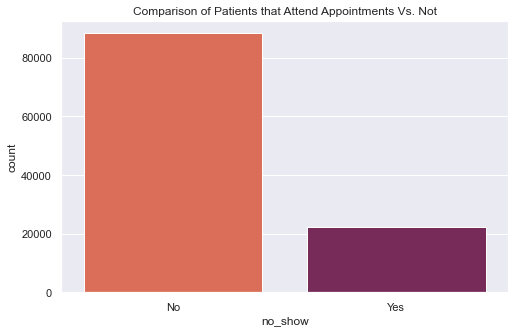

In [41]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df.no_show, data=df, palette="rocket_r")
ax.set_title("Comparison of Patients that Attend Appointments Vs. Not")
plt.show()

This confirms our class imbalance noted earlier.
- There are 110,527 total patients.
- Around 88,000 (about 80%) show up for their appointments.

Let's see if there are any patterns for the patients and their appointment habits.

## Gender:

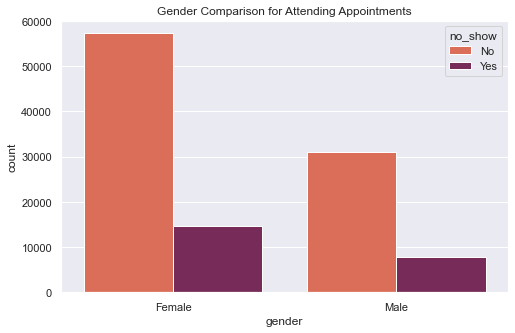

In [42]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df.gender, hue=df.no_show, data=df, palette="rocket_r")
ax.set_title("Gender Comparison for Attending Appointments")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [43]:
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [44]:
females_total = (71840/110527)*100
females_total

64.99769287142509

This shows that of the 80% of patients that attend their appointments:
- about 58,000 of them are female and 
- about 30,500 are male

Out of the 20% that do not attend their appointments:
- about 13,000 are females 
- about 8,00 are males

- Seems that female patients have more appointments than male patients. 
- The ratios of females not showing up and males not showing up though seem the same as total patients not showing.

## Age:

A boxplot will probably show the age data best.

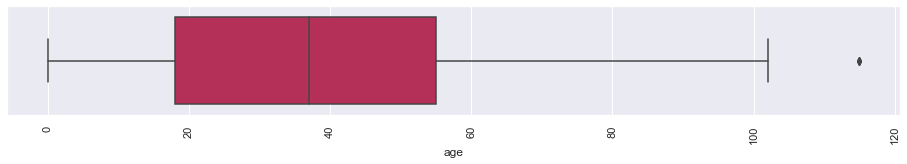

In [45]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=df.age, palette="rocket_r")

Our age boxplot shows:
- It looks like the median age is around 30.
- IQR is between 18 and 55
- I think the outliers should stay for now.

Let's look at the the frequencies for each age.

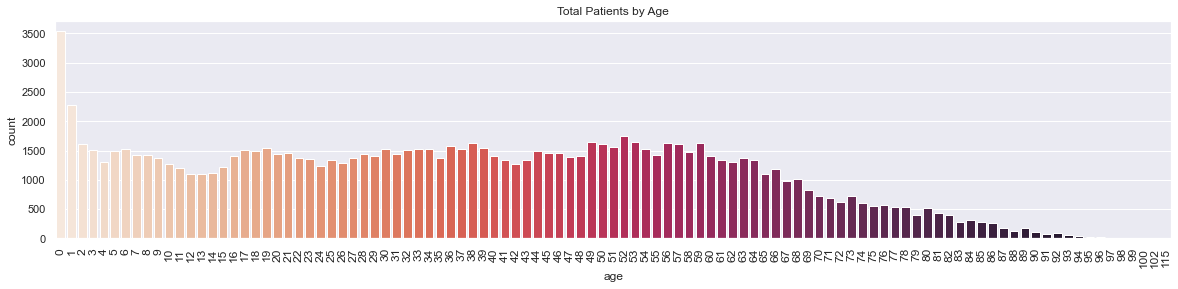

In [46]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90, fontsize=12)
ax = sns.countplot(x=df.age, palette="rocket_r")
ax.set_title("Total Patients by Age")
plt.show()

This histogram shows that there are peaks for baby patients and then the distribution starts to be uniform.
- around 60 there is a slight right-skewed distribution

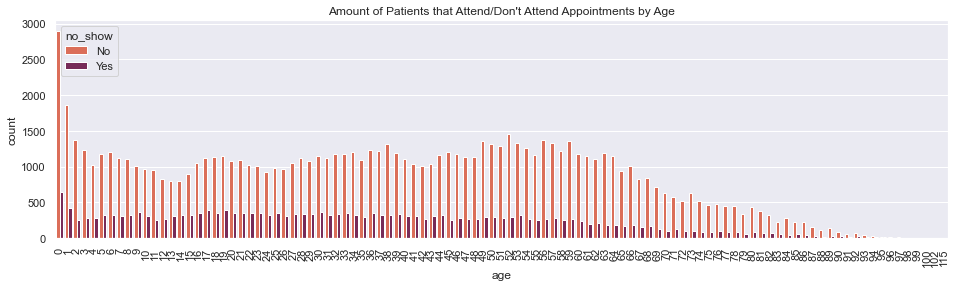

In [47]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.age, hue=df.no_show, palette="rocket_r")
ax.set_title("Amount of Patients that Attend/Don't Attend Appointments by Age")
plt.show()

Looking at this histogram, it still looks to me like 80% attend and 20% do not, across the board.

** Side thought: It may be easier to explore with age groups.

In [48]:
age_ratio = (df[df.no_show == 'No'].groupby(['age']).size()/df.groupby(['age']).size())*100

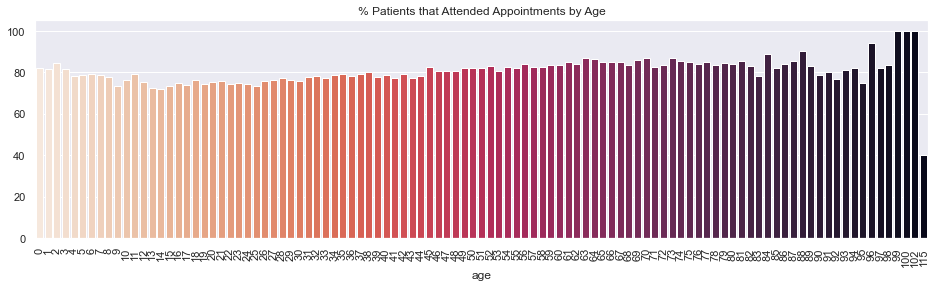

In [49]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=age_ratio.index, y=age_ratio, palette="rocket_r")
ax.set_title("% Patients that Attended Appointments by Age")
plt.show()

This confirms that around 80% of patients attend their appointments.

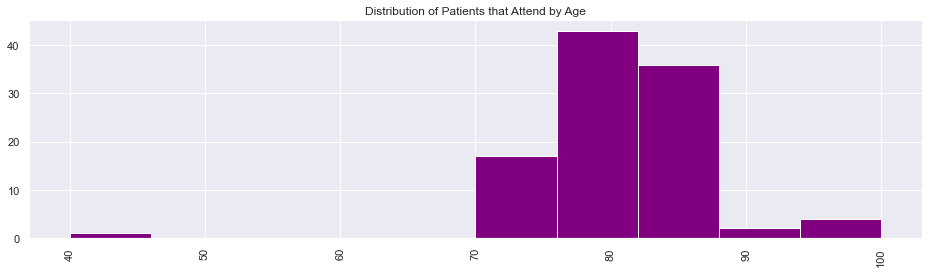

In [50]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(age_ratio, color='purple')
plt.title("Distribution of Patients that Attend by Age")
plt.show()

## Neighborhood:

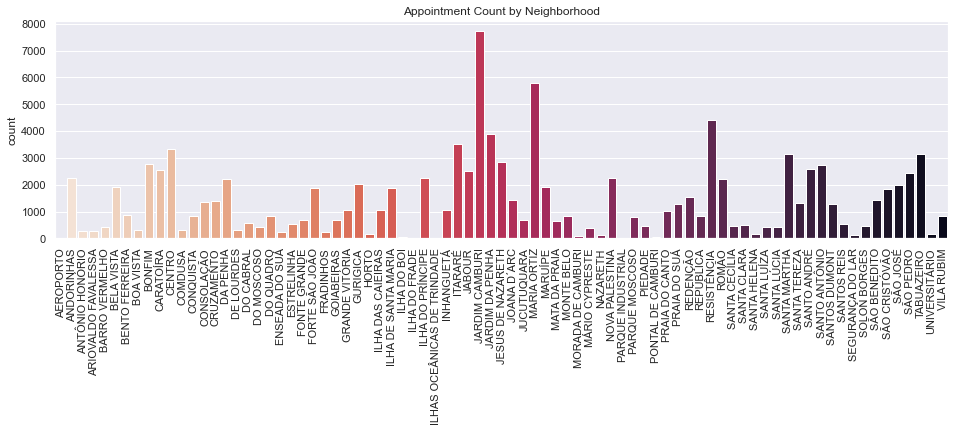

In [51]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.neighborhood), palette="rocket_r")
ax.set_title("Appointment Count by Neighborhood")
plt.show()

Clearly there are neighborhoods with larger amounts of patients than others.

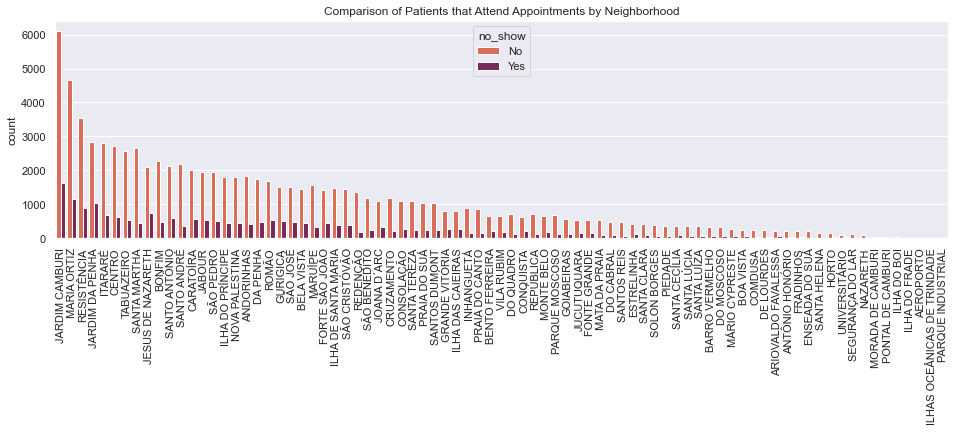

In [52]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.neighborhood), hue=df.no_show, 
                   order=df.neighborhood.value_counts().index, 
                   palette="rocket_r")
ax.set_title("Comparison of Patients that Attend Appointments by Neighborhood")
plt.show()


It looks to me like the ratio of patients that attend appointments is also the same by neighborhood.  Let's check percentages to be sure.

In [53]:
neighborhood_ratio = (df[df.no_show == 'No'].groupby(['neighborhood']).size()/df.groupby(['neighborhood']).size())*100

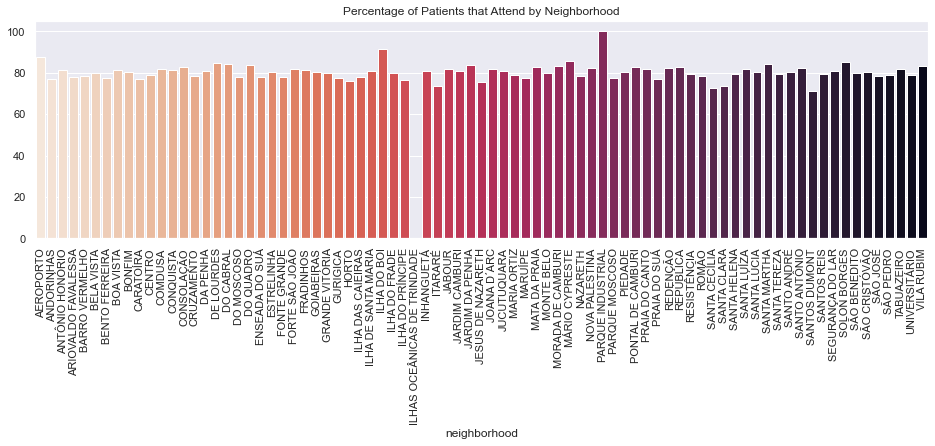

In [54]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=neighborhood_ratio.index, y=neighborhood_ratio, palette="rocket_r")
ax.set_title("Percentage of Patients that Attend by Neighborhood")
plt.show()

Here, again, this seems to confirm that about 80% of all neighborhoods attend appointments.

# Scholarship:

Scholarship is a program that provides financial aid for access to health care.

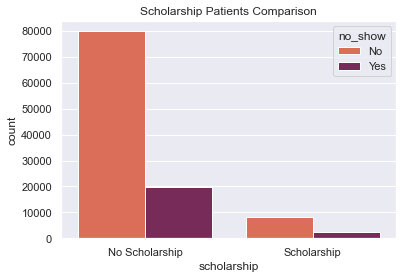

In [55]:
ax = sns.countplot(x=df.scholarship, hue=df.no_show, data=df, palette="rocket_r")
ax.set_title("Scholarship Patients Comparison")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

There are a lot less patients with a scholarship compared to those with.  It also seems that scholarship patients generally attend their appointments, which makes sense!  Aid for health care services looks to be a motivator for attending.

In [56]:
scholar_ratio = (df[df.no_show == 'No'].groupby(['scholarship']).size()/df.groupby(['scholarship']).size())*100

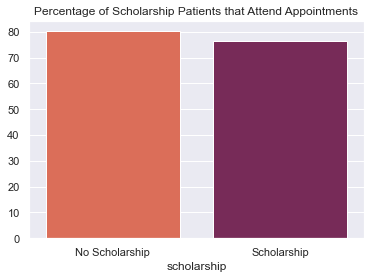

In [57]:
ax = sns.barplot(x=scholar_ratio.index, y=scholar_ratio, palette="rocket_r")
ax.set_title("Percentage of Scholarship Patients that Attend Appointments")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

To me this is evidence against my original thought.  I would like to explore this further.
- looks like there are around 100,000 patients without scholarship - 80% attended
- about 10,500 patients with scholarship - 75% attended
- this could be a significant feature!

## Hypertension:

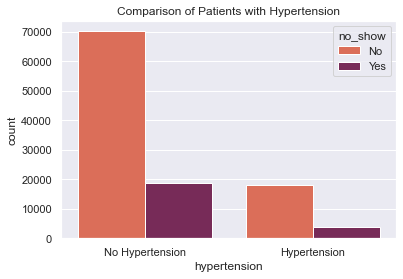

In [58]:
ax = sns.countplot(x=df.hypertension, hue=df.no_show, data=df, palette="rocket_r")
ax.set_title("Comparison of Patients with Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [59]:
hyp_ratio = (df[df.no_show == 'No'].groupby(['hypertension']).size()/df.groupby(['hypertension']).size())*100

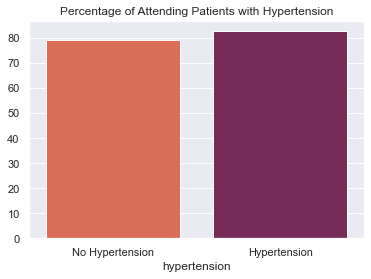

In [60]:
ax = sns.barplot(x=hyp_ratio.index, y=hyp_ratio, palette="rocket_r")
ax.set_title("Percentage of Attending Patients with Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that there are around 88,000 patients without hypertension and out of them around 78% attend the visit.
Out of the 22,500 patients with hypertension around 85% of them attend the visit.
- This could be a significant feature.

## Diabetes:

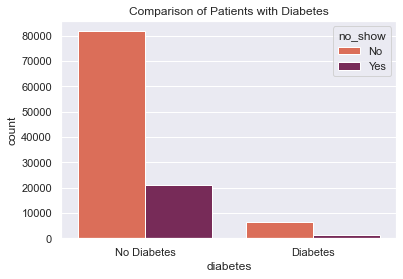

In [61]:
ax = sns.countplot(x=df.diabetes, hue=df.no_show, data=df, palette="rocket_r")
ax.set_title("Comparison of Patients with Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [62]:
diabetes_ratio = (df[df.no_show == 'No'].groupby(['diabetes']).size()/df.groupby(['diabetes']).size())*100

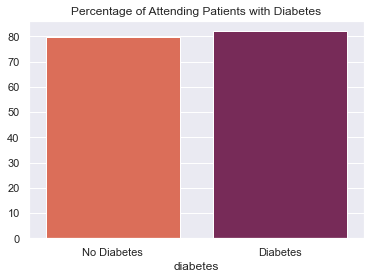

In [63]:
ax = sns.barplot(x=diabetes_ratio.index, y=diabetes_ratio, palette="rocket_r")
ax.set_title("Percentage of Attending Patients with Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- 100,000 patients without diabetes -->  80% attend
- 8,500 patients with diabetes around 82% attend


## Alcoholism:

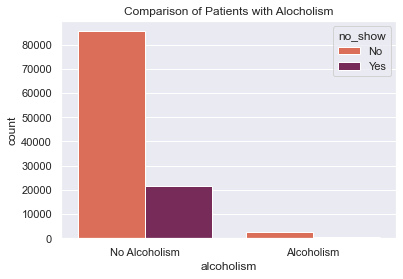

In [64]:
ax = sns.countplot(x=df.alcoholism, hue=df.no_show, data=df, 
                   palette="rocket_r")
ax.set_title('Comparison of Patients with Alocholism')
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

Very small amount of patients are alcholics.

In [65]:
alcoholism_ratio = (df[df.no_show == 'No'].groupby(['alcoholism']).size()/df.groupby(['alcoholism']).size())*100

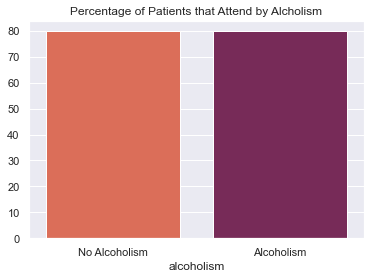

In [66]:
ax = sns.barplot(x=alcoholism_ratio.index, y=alcoholism_ratio, 
                 palette="rocket_r")
ax.set_title("Percentage of Patients that Attend by Alcholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

Again, we see about 80% for both.

## Handicap:

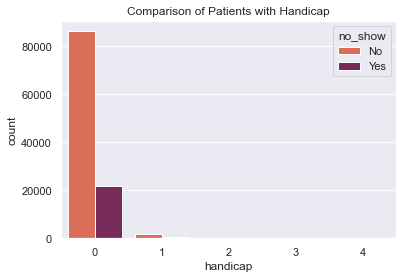

In [67]:
ax = sns.countplot(x=df.handicap, hue=df.no_show, data=df, palette="rocket_r")
ax.set_title("Comparison of Patients with Handicap")
plt.show()

This seems like a very small percentage of patients here as well.

In [68]:
handicap_ratio = (df[df.no_show == 'No'].groupby(['handicap']).size()/df.groupby(['handicap']).size())*100

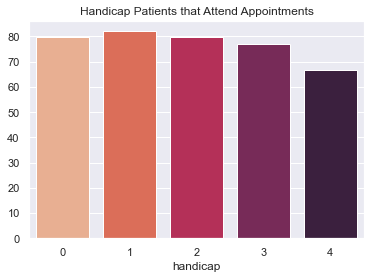

In [69]:
ax = sns.barplot(x=handicap_ratio.index, y=handicap_ratio, palette="rocket_r")
ax.set_title("Handicap Patients that Attend Appointments")
plt.show()

About 80% attend their appointments.  It does did down at level 4.  This would be beneficial to look into for significance, if any.

## SMS Received:

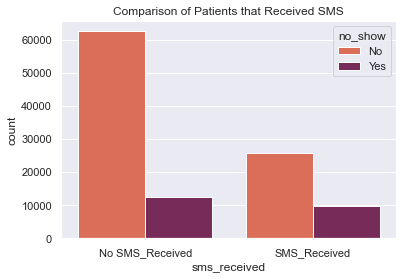

In [70]:
ax = sns.countplot(x=df.sms_received, hue=df.no_show, data=df, palette="rocket_r")
ax.set_title("Comparison of Patients that Received SMS")
x_ticks_labels=['No SMS_Received', 'SMS_Received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [71]:
sms_received_ratio = (df[df.no_show == 'No'].groupby(['sms_received']).size()/df.groupby(['sms_received']).size())*100

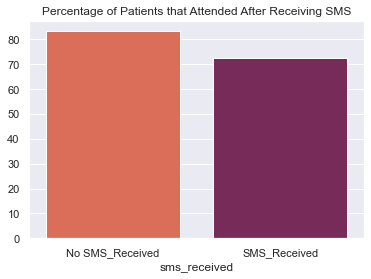

In [72]:
ax = sns.barplot(x=sms_received_ratio.index, y=sms_received_ratio, 
                 palette="rocket_r")
ax.set_title("Percentage of Patients that Attended After Receiving SMS")
x_ticks_labels=['No SMS_Received', 'SMS_Received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

This is interesting!
- about 82% of patients that did not get a confirmation text still attended their appointment
- around 71% of patients that did get a text attended

This is definitely not what I expected since you would think a confirmation/reminder text would be a motivater to attend.

## Day of Week Appointment was Scheduled:

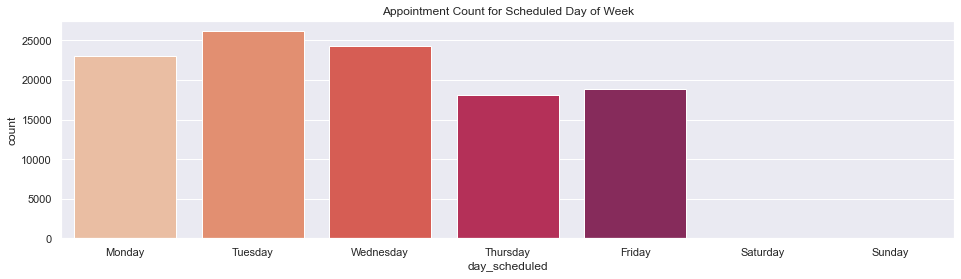

In [73]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.day_scheduled, order=weekdays, palette="rocket_r")
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

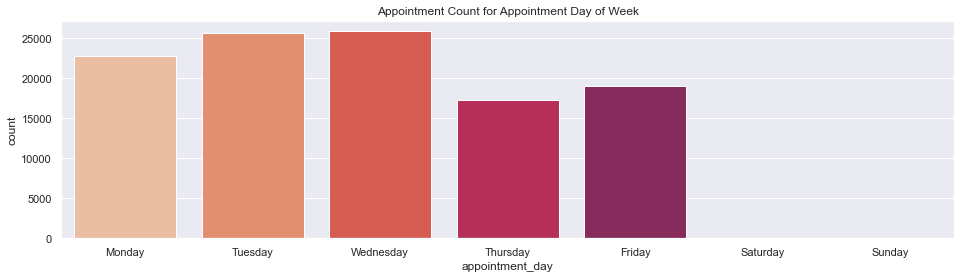

In [74]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.appointment_day, order=weekdays, palette="rocket_r")
ax.set_title("Appointment Count for Appointment Day of Week")
plt.show()

There looks like a pattern with the appointments from the above visualizations. Also, we can see there are very less appointments on Saturday and no appointments on Sunday.
So, AppointmentDay_DOW could help in determining if a patient visits the hospital after taking an appointment.

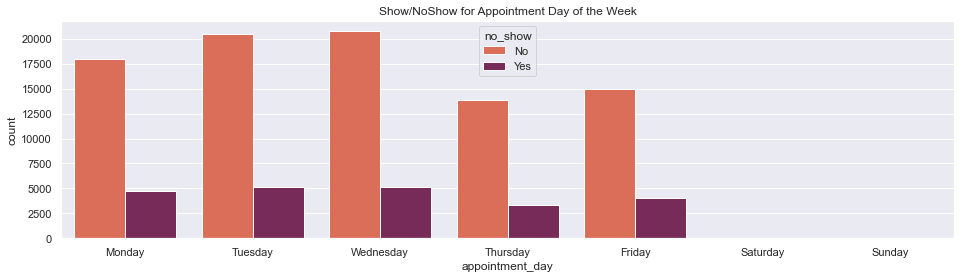

In [75]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.appointment_day, hue=df.no_show, 
                   order=weekdays, palette="rocket_r")
ax.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

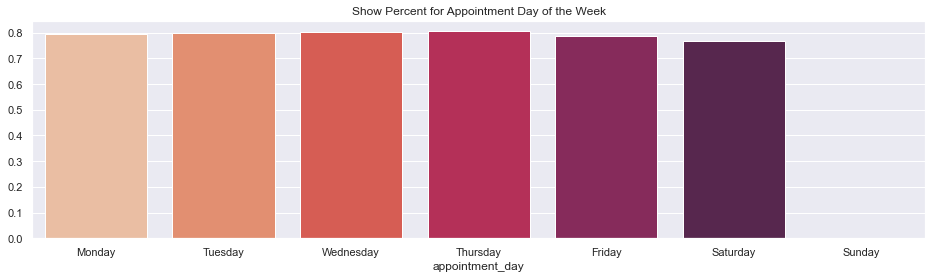

In [76]:
appointment_day_ratio = df[df.no_show == 'No'].groupby(['appointment_day']).size()/df.groupby(['appointment_day']).size()
plt.figure(figsize=(16,4))
ax = sns.barplot(x=appointment_day_ratio.index, y=appointment_day_ratio, 
                 order=weekdays, palette="rocket_r")
ax.set_title("Show Percent for Appointment Day of the Week")
plt.show()

As we predicted earlier, we do not see a clear pattern in the patients visits based on the week day. But we can observe that on Saturday's the percentage of visits is less. So, AppointmentDay_DOW can help us in predicting the visits by a small number.

In [77]:
df.columns

Index(['gender', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show',
       'date_scheduled', 'appointment_date', 'day_scheduled',
       'appointment_day', 'days_inbetween'],
      dtype='object')

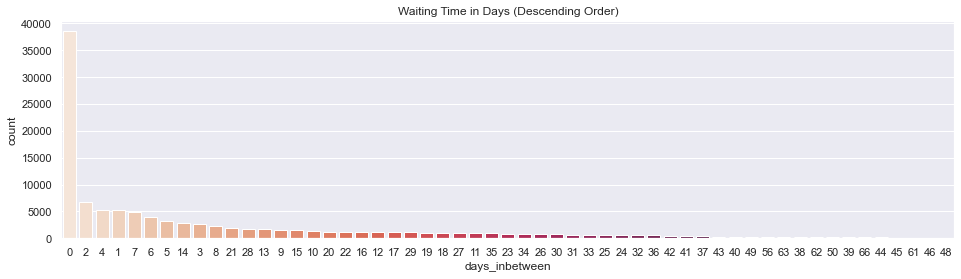

In [78]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.days_inbetween, 
                   order=df.days_inbetween.value_counts().iloc[:55].index, 
                   palette="rocket_r")
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()

From the above visualization we can see that most of the patients are booking their appointments on the same day. The next highest waiting times are 2days, 4 days and 1 day.

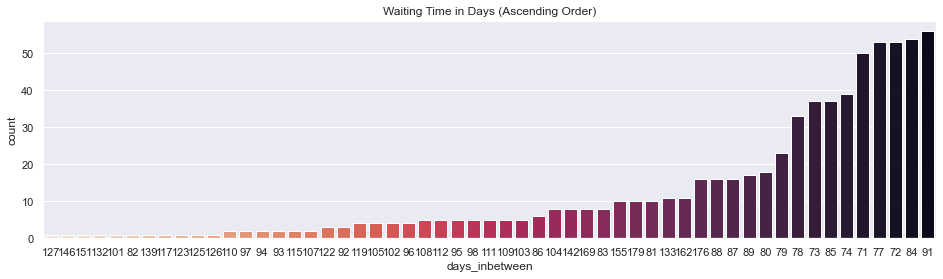

In [79]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.days_inbetween, 
        order=df.days_inbetween.value_counts(ascending=True).iloc[:55].index, 
                  palette="rocket_r")
ax.set_title("Waiting Time in Days (Ascending Order)")
plt.show()

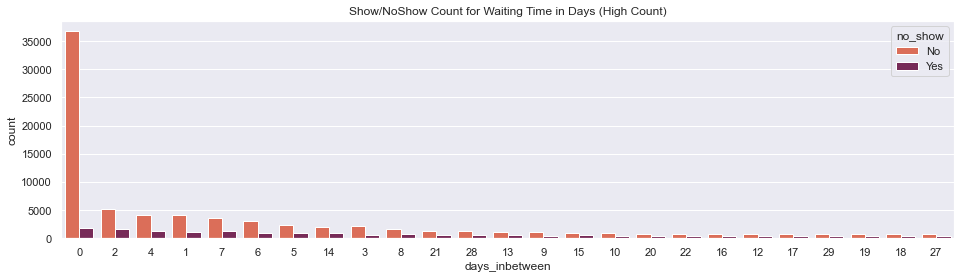

In [80]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.days_inbetween, hue=df.no_show, 
                   order=df.days_inbetween.value_counts().iloc[:25].index, 
                  palette="rocket_r")
ax.set_title("Show/NoShow Count for Waiting Time in Days (High Count)")
plt.show()

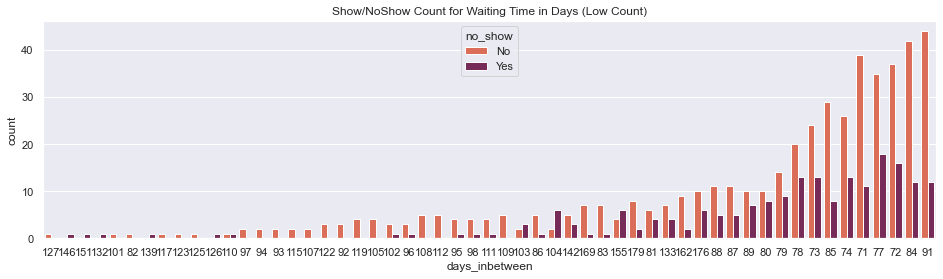

In [81]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.days_inbetween, 
                   hue=df.no_show, 
    order=df.days_inbetween.value_counts(ascending=True).iloc[:55].index, 
                  palette="rocket_r")
ax.set_title("Show/NoShow Count for Waiting Time in Days (Low Count)")
plt.show()

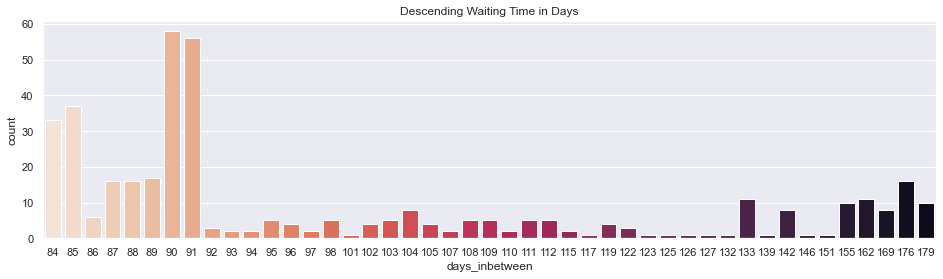

In [82]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df[['days_inbetween']].sort_values('days_inbetween', 
                        ascending=False).days_inbetween.iloc[:400], 
                  palette="rocket_r")
ax.set_title("Descending Waiting Time in Days")
plt.show()

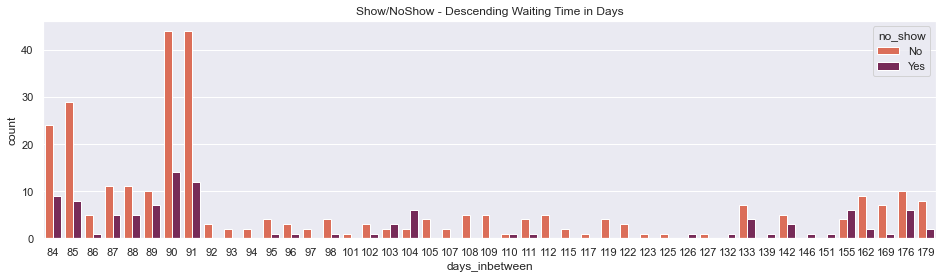

In [83]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df[['days_inbetween']].sort_values('days_inbetween', 
            ascending=False).days_inbetween.iloc[:400], 
                   hue=df.no_show, palette="rocket_r")
ax.set_title("Show/NoShow - Descending Waiting Time in Days")
plt.show()

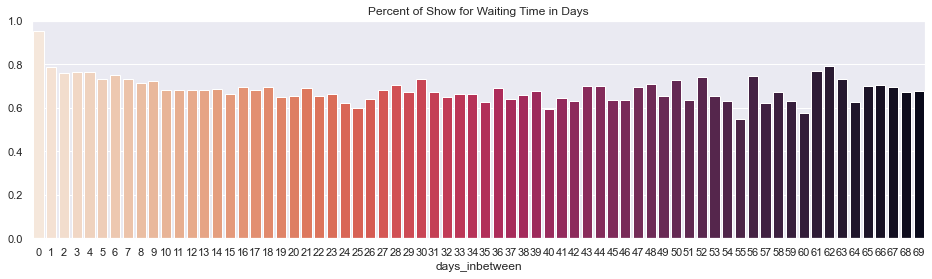

In [84]:
days_inbetween_ratio = df[df.no_show == 'No'].groupby(['days_inbetween']).size()/df.groupby(['days_inbetween']).size()

plt.figure(figsize=(16,4))
ax = sns.barplot(x=days_inbetween_ratio.index, y=days_inbetween_ratio, 
                 order=df.days_inbetween.iloc[:70].index, palette="rocket_r")
ax.set_title("Percent of Show for Waiting Time in Days")
plt.show()

In [85]:
df.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date,day_scheduled,appointment_day,days_inbetween
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0


From the above visualization we can see that around 95% of the patients who have booked their appointments on the same day and visiting the hospital without fail. Also close to 80% of the patients are visiting the hospital if they had booked their appointments just before 4 days.

As we have a clear distinction for the patients Show/NoShow with the Waiting_Time_days feature this indeed should help us with a better prediction.

In [86]:
noShow = df[df.days_inbetween < 350]

In [87]:
noShow.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date,day_scheduled,appointment_day,days_inbetween
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,Friday,Friday,0


In [88]:
def probStatus(dataset, group_by):
    df = pd.crosstab(index = dataset[group_by], columns = dataset.no_show).reset_index()
    df['probShowUp'] = df['Yes'] / (df['Yes'] + df['No'])
    return df[[group_by, 'probShowUp']]

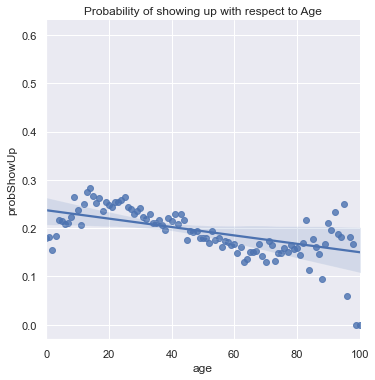

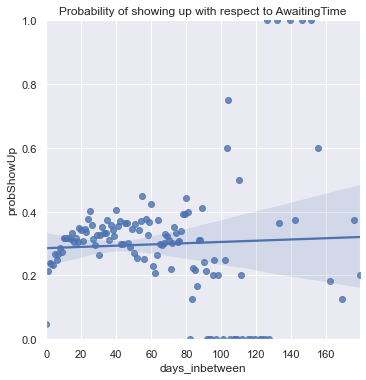

In [89]:
sns.lmplot(data = probStatus(noShow, 'age'), x = 'age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to Age')
plt.show()


sns.lmplot(data = probStatus(noShow, 'days_inbetween'), x = 'days_inbetween', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to AwaitingTime')
plt.ylim(0, 1)
plt.show()


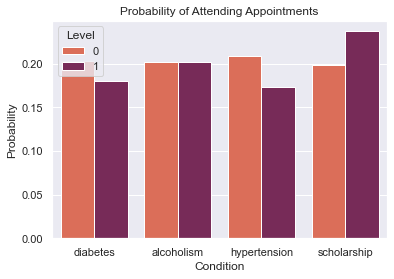

In [90]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in noShow[item].unique():
            row = {'Condition': item}
            total = len(noShow[noShow[item] == level])
            n = len(noShow[(noShow[item] == level) & (noShow.no_show == 'Yes')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

sns.barplot(data = probStatusCategorical(['diabetes', 'alcoholism',
                                          'hypertension','scholarship']), 
            x = 'Condition', y = 'Probability', 
                                         hue = 'Level', palette = 'rocket_r')
plt.title('Probability of Attending Appointments')
plt.ylabel('Probability')
plt.show()

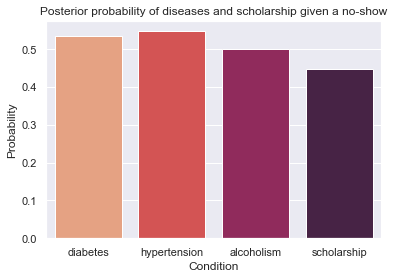

In [91]:
def posteriorNoShow(condition):
    levels = list(noShow[condition].unique())
    if condition not in ['appointment_day', 'gender']: 
        levels.remove(0)
    rows = []
    for level in levels:
        p = len(noShow[noShow[condition] == level]) / len(noShow)
        p1 = len(noShow[(noShow[condition] == level) & (noShow.no_show == 'No')]) / len(noShow[noShow.no_show == 'No'])
        p2 = len(noShow[(noShow[condition] == level) & (noShow.no_show == 'Yes')]) / len(noShow[noShow.no_show == 'Yes'])
        if len(levels) > 1:
            rows.append({'Levels': level, 
                         'Probability': (p * p1) / (p * p1 + p * p2)})
        else:
            rows.append({'Condition': condition,
                         'Probability': (p * p1) / (p * p1 + p * p2)})
    return rows
    
tuples = []
tuples.extend(posteriorNoShow('diabetes'))
tuples.extend(posteriorNoShow('hypertension'))
tuples.extend(posteriorNoShow('alcoholism'))
tuples.extend(posteriorNoShow('scholarship'))

sns.barplot(data = pd.DataFrame(tuples)[['Condition', 'Probability']], 
            x = 'Condition', y = 'Probability', palette = 'rocket_r')
plt.title('Posterior probability of diseases and scholarship given a no-show')
plt.ylabel('Probability')
plt.show()

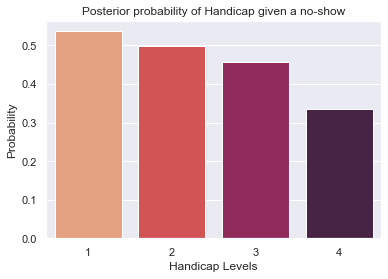

In [92]:
sns.barplot(data = pd.DataFrame(posteriorNoShow('handicap')), 
            x = 'Levels', y = 'Probability', palette = 'rocket_r')
plt.xlabel('Handicap Levels')
plt.ylabel('Probability')
plt.title('Posterior probability of Handicap given a no-show')
plt.show()

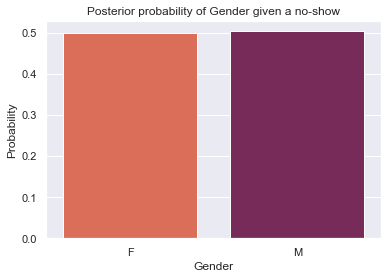

In [93]:
sns.barplot(data = pd.DataFrame(posteriorNoShow('gender')), 
            x = 'Levels', y = 'Probability', palette = 'rocket_r')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.title('Posterior probability of Gender given a no-show')
plt.show()


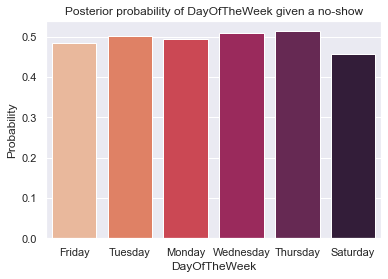

In [94]:
sns.barplot(data = pd.DataFrame(posteriorNoShow('appointment_day')), 
            x = 'Levels', y = 'Probability', palette = 'rocket_r')
plt.xlabel('DayOfTheWeek')
plt.ylabel('Probability')
plt.title('Posterior probability of DayOfTheWeek given a no-show')
plt.show()

# Modeling:

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gender            110527 non-null  object        
 1   age               110527 non-null  int64         
 2   neighborhood      110527 non-null  object        
 3   scholarship       110527 non-null  int64         
 4   hypertension      110527 non-null  int64         
 5   diabetes          110527 non-null  int64         
 6   alcoholism        110527 non-null  int64         
 7   handicap          110527 non-null  int64         
 8   sms_received      110527 non-null  int64         
 9   no_show           110527 non-null  object        
 10  date_scheduled    110527 non-null  datetime64[ns]
 11  appointment_date  110527 non-null  datetime64[ns]
 12  day_scheduled     110527 non-null  object        
 13  appointment_day   110527 non-null  object        
 14  days

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [97]:
# Use `LabelEncoder` to encode labels with value between 0 and n_classes-1.

encoder = LabelEncoder()
df.gender = encoder.fit_transform(df['gender'])

df.neighborhood = encoder.fit_transform(df['neighborhood'])

df.day_scheduled = encoder.fit_transform(df['day_scheduled'])

df.appointment_day = encoder.fit_transform(df['appointment_day'])

df.no_show = encoder.fit_transform(df['no_show'])

In [98]:
df.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,date_scheduled,appointment_date,day_scheduled,appointment_day,days_inbetween
0,0,62,39,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0,0,0
1,1,56,39,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,0
2,0,62,45,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,0
3,0,8,54,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,0
4,0,56,39,0,1,1,0,0,0,0,2016-04-29,2016-04-29,0,0,0


In [99]:
df.day_scheduled.value_counts()

4    26168
5    24262
1    23085
0    18915
3    18073
2       24
Name: day_scheduled, dtype: int64

In [100]:
df['ScheduledDay_Y'] = df['date_scheduled'].dt.year
df['ScheduledDay_M'] = df['date_scheduled'].dt.month
df['ScheduledDay_D'] = df['date_scheduled'].dt.day
df.drop(['date_scheduled'], axis=1, inplace=True)

df['AppointmentDay_Y'] = df['appointment_date'].dt.year
df['AppointmentDay_M'] = df['appointment_date'].dt.month
df['AppointmentDay_D'] = df['appointment_date'].dt.day
df.drop(['appointment_date'], axis=1, inplace=True)

In [184]:
df.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_scheduled,appointment_day,days_inbetween,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
0,0,62,39,0,1,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
1,1,56,39,0,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
2,0,62,45,0,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
3,0,8,54,0,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
4,0,56,39,0,1,1,0,0,0,0,0,0,0,2016,4,29,2016,4,29


In [185]:
# specify target variable
X = df.drop(['no_show', 'ScheduledDay_Y', 'AppointmentDay_Y'], axis=1)
y = df['no_show']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

## Feature Importance Exploration:

### Decision Tree:

I'd like to try a decision tree classifier first to explore feature significance.

In [187]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [188]:
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(dt_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance:

gender -- 0.23
age -- 0.23
neighborhood -- 0.17
scholarship -- 0.08
hypertension -- 0.08
diabetes -- 0.05
alcoholism -- 0.04
handicap -- 0.04
sms_received -- 0.02
day_scheduled -- 0.02
appointment_day -- 0.01
days_inbetween -- 0.01
ScheduledDay_M -- 0.01
ScheduledDay_D -- 0.01
AppointmentDay_M -- 0.01
AppointmentDay_D -- 0.00


In [189]:
dt_clf.score(X_test, y_test)

0.7289423685877138

### Random Forest:

In [190]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [191]:
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(rf_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance:

gender -- 0.29
age -- 0.25
neighborhood -- 0.14
scholarship -- 0.06
hypertension -- 0.06
diabetes -- 0.04
alcoholism -- 0.04
handicap -- 0.04
sms_received -- 0.02
day_scheduled -- 0.02
appointment_day -- 0.01
days_inbetween -- 0.01
ScheduledDay_M -- 0.01
ScheduledDay_D -- 0.01
AppointmentDay_M -- 0.01
AppointmentDay_D -- 0.01


In [192]:
rf_clf.score(X_test, y_test)

0.7858952320636932

They are all around an 80% accuracy.  Which seems about right.

Features to work with:
- gender
- age
- neighborhood

### GridSearchCV:

In [111]:
# params={'n_estimators':[10,20], 'max_depth':[None, 5], 'min_samples_split':[2,3]}
# rf_clf = RandomForestClassifier(random_state=42)
# clf_grid = GridSearchCV(rf_clf, params, cv=5, n_jobs=-1, verbose=1)
# clf_grid.fit(X, y)
# print(clf_grid.best_params_)
# print(clf_grid.best_score_)

In [193]:
rf_clf = RandomForestClassifier(max_depth= 5, min_samples_split= 2, 
                                n_estimators=10, random_state=42)
# rf_clf.fit(X_train, y_train)

In [195]:
# print("Feature Importance:\n")
# for name, importance in zip(X.columns, np.sort(rf_clf.feature_importances_)[::-1]):
#     print("{} -- {:.2f}".format(name, importance))

Confusion Matrix: 
 [[17669     0]
 [ 4437     0]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.80      1.00      0.89     17669
        Show       0.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106
 

True Negative: 17669
False Positive: 0
False Negative: 4437
True Positive: 0 

Precision score: 0.39964263095992036
Recall score: 0.5
F1 score : 0.4442237586423633
Accuracy score: 0.7992852619198407


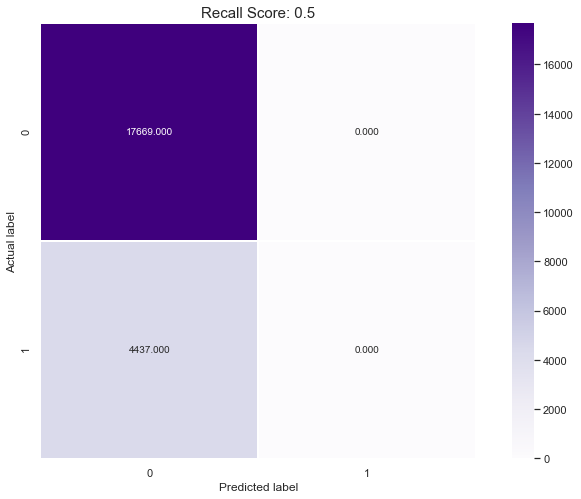

In [196]:
predictions, score = model_test(rf_clf, X_train, y_train)
get_model_performance(predictions, 'Purples')


## Precision and Recall Exploration:

In [121]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [122]:
def model_test(model, X_train, y_train):
   # fit model on training data
    model.fit(X_train, y_train)
    
    # get model predictions and score on test set
    predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    return predictions, score

def run_model_multiple(model, X_train, y_train, n=10):
    return np.mean([model_test(model, X_train, y_train) for j in range(n)])

In [123]:
def get_model_performance(predictions, color):
    cfm = confusion_matrix(y_test, predictions)
    clr = classification_report(y_test, predictions, 
                                target_names = ['No Show', 'Show'])
                                           
    true_negative = cfm[0][0]
    false_positive = cfm[0][1]
    false_negative = cfm[1][0]
    true_positive = cfm[1][1]

    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    accuracy = accuracy_score(y_test, predictions)
    
    print(f'Confusion Matrix: \n', cfm, '\n')
    print(f'Classification Report: \n', clr, '\n')
    
    print(f'True Negative: {true_negative}')
    print(f'False Positive: {false_positive}')
    print(f'False Negative: {false_negative}')
    print(f'True Positive: {true_positive}', '\n')
    
    print (f'Precision score: {precision}')
    print (f'Recall score: {recall}')
    print (f'F1 score : {f1}')
    print (f'Accuracy score: {accuracy}')
    
    plt.figure(figsize=(13,8))
    sns.heatmap(confusion_matrix(y_test, predictions), 
            annot=True, fmt=".3f", linewidths=.5, square = True, 
                cmap = color);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = (f'Recall Score: {recall}')
    plt.title(all_sample_title, size = 15);

In [124]:
def get_important_feats(model, X_train):
    feature_importance = model.feature_importances_
    feat_importances = pd.Series(model.feature_importances_, 
                                 index=X_train.columns)
    feat_importances = feat_importances.nlargest(19)
    feat_importances.plot(kind='barh' , figsize=(10,10)) 
    plt.show()

In [125]:
xgb = XGBClassifier()
decision = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()
forest = RandomForestClassifier()

Confusion Matrix: 
 [[17664     5]
 [ 4420    17]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.80      1.00      0.89     17669
        Show       0.77      0.00      0.01      4437

    accuracy                           0.80     22106
   macro avg       0.79      0.50      0.45     22106
weighted avg       0.79      0.80      0.71     22106
 

True Negative: 17664
False Positive: 5
False Negative: 4420
True Positive: 17 

Precision score: 0.7862911857206369
Recall score: 0.5017742180657554
F1 score : 0.4481563371242857
Accuracy score: 0.799828100968063


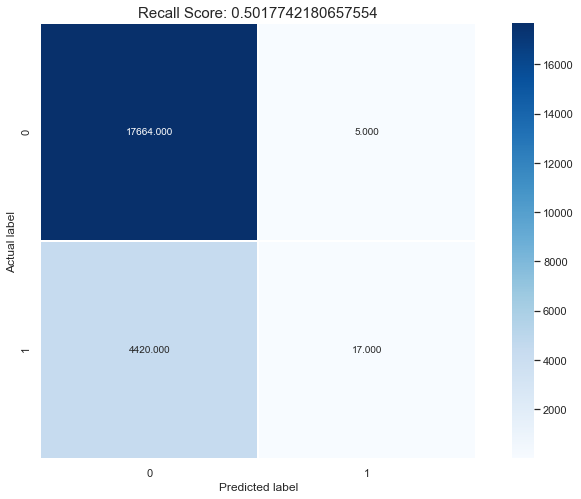

In [126]:
predictions, score = model_test(xgb, X_train, y_train)
get_model_performance(predictions, 'Blues')


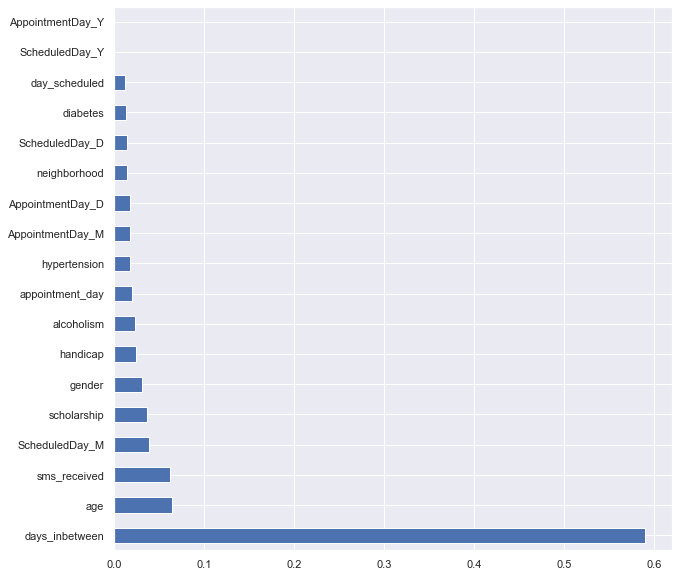

In [127]:
get_important_feats(xgb, X_train)

Confusion Matrix: 
 [[14571  3098]
 [ 2917  1520]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.83      0.82      0.83     17669
        Show       0.33      0.34      0.34      4437

    accuracy                           0.73     22106
   macro avg       0.58      0.58      0.58     22106
weighted avg       0.73      0.73      0.73     22106
 

True Negative: 14571
False Positive: 3098
False Negative: 2917
True Positive: 1520 

Precision score: 0.5811733626562514
Recall score: 0.5836192390322158
F1 score : 0.5823182173733359
Accuracy score: 0.7279019270786212


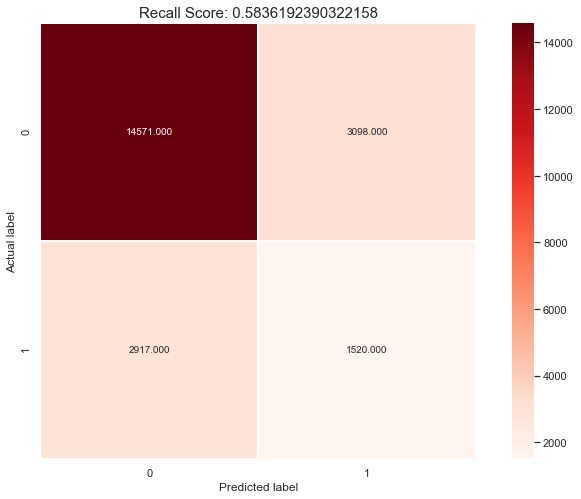

In [128]:
predictions, score = model_test(decision, X_train, y_train)
get_model_performance(predictions, 'Reds')


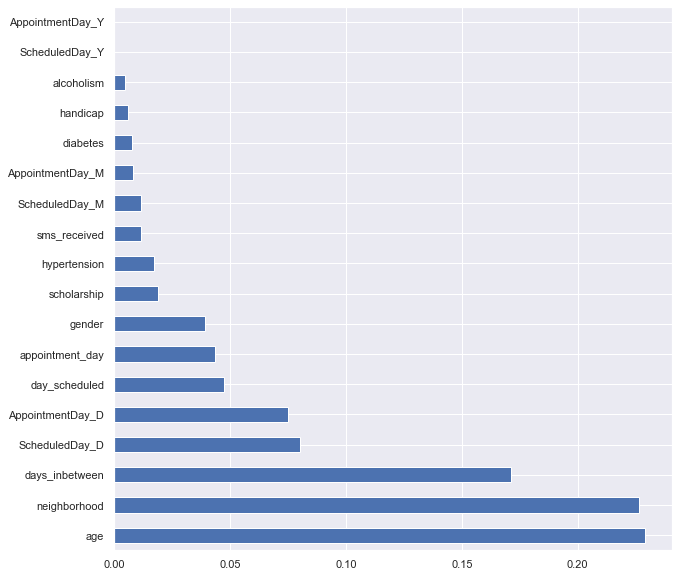

In [129]:
get_important_feats(decision, X_train)

Confusion Matrix: 
 [[17650    19]
 [ 4420    17]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.80      1.00      0.89     17669
        Show       0.47      0.00      0.01      4437

    accuracy                           0.80     22106
   macro avg       0.64      0.50      0.45     22106
weighted avg       0.73      0.80      0.71     22106
 

True Negative: 17650
False Positive: 19
False Negative: 4420
True Positive: 17 

Precision score: 0.6359751799828828
Recall score: 0.5013780439755409
F1 score : 0.447948647396878
Accuracy score: 0.799194788745137


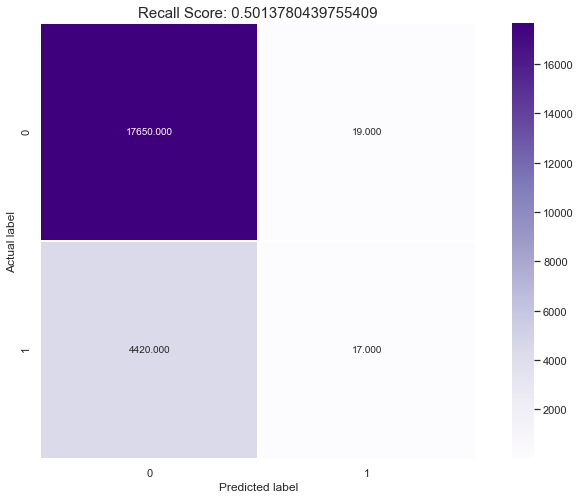

In [130]:
predictions, score = model_test(gbc, X_train, y_train)
get_model_performance(predictions, 'Purples')


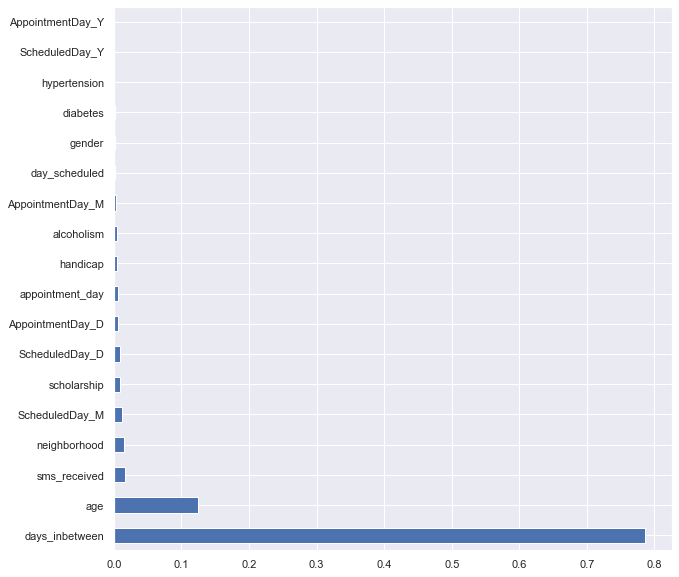

In [131]:
get_important_feats(gbc, X_train)

Confusion Matrix: 
 [[16226  1443]
 [ 3535   902]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.82      0.92      0.87     17669
        Show       0.38      0.20      0.27      4437

    accuracy                           0.77     22106
   macro avg       0.60      0.56      0.57     22106
weighted avg       0.73      0.77      0.75     22106
 

True Negative: 16226
False Positive: 1443
False Negative: 3535
True Positive: 902 

Precision score: 0.6028802397606623
Recall score: 0.5608110263620762
F1 score : 0.5665016533762857
Accuracy score: 0.7748122681624898


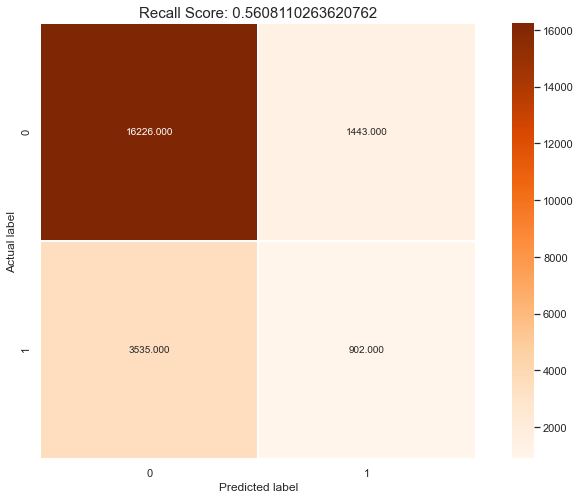

In [132]:
predictions, score = model_test(knn, X_train, y_train)
get_model_performance(predictions, 'Oranges')


In [133]:
# get_important_feats(knn, X_train)

Confusion Matrix: 
 [[16371  1298]
 [ 3503   934]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.82      0.93      0.87     17669
        Show       0.42      0.21      0.28      4437

    accuracy                           0.78     22106
   macro avg       0.62      0.57      0.58     22106
weighted avg       0.74      0.78      0.75     22106
 

True Negative: 16371
False Positive: 1298
False Negative: 3503
True Positive: 934 

Precision score: 0.6210991702925563
Recall score: 0.5685202981279227
F1 score : 0.5761109667072934
Accuracy score: 0.7828191441237673


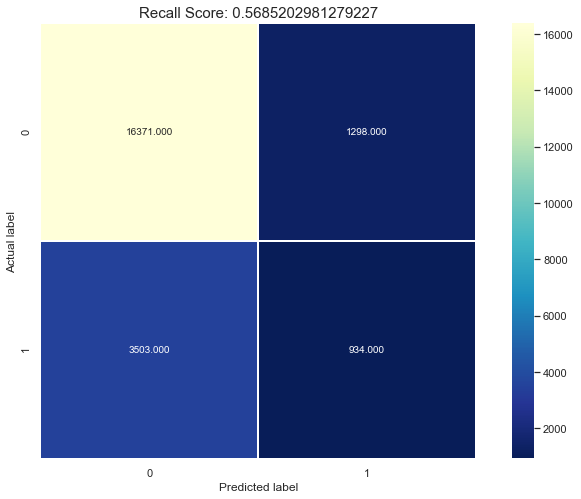

In [134]:
predictions, score = model_test(forest, X_train, y_train)
get_model_performance(predictions, 'YlGnBu_r')


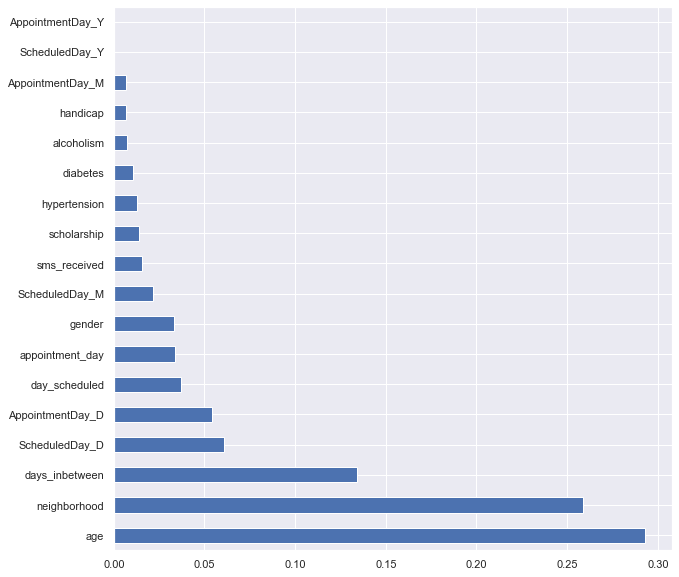

In [135]:
get_important_feats(forest, X_train)

In [136]:
from imblearn.over_sampling import SMOTE, SMOTENC


In [137]:
X_train.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,day_scheduled,appointment_day,days_inbetween,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
58187,0,25,45,0,0,0,0,0,0,5,3,8,2016,5,11,2016,5,19
5095,1,62,24,0,0,0,0,0,0,0,4,4,2016,5,13,2016,5,17
67919,0,65,38,0,0,0,0,0,0,4,1,48,2016,3,22,2016,5,9
2861,1,41,43,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
45949,1,61,44,0,1,0,1,0,0,0,1,3,2016,5,6,2016,5,9


In [138]:
for inx, col in enumerate(X_train.columns):
    print(inx, col)

0 gender
1 age
2 neighborhood
3 scholarship
4 hypertension
5 diabetes
6 alcoholism
7 handicap
8 sms_received
9 day_scheduled
10 appointment_day
11 days_inbetween
12 ScheduledDay_Y
13 ScheduledDay_M
14 ScheduledDay_D
15 AppointmentDay_Y
16 AppointmentDay_M
17 AppointmentDay_D


In [139]:
cats = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17]


In [153]:
xgb = XGBClassifier()
decision = DecisionTreeClassifier(class_weight='balanced')
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()
forest = RandomForestClassifier(class_weight='balanced')

In [140]:
smnc = SMOTENC(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    n_jobs=4,
    categorical_features=cats
)  

X_res, y_res = smnc.fit_resample(X_train, y_train)

In [141]:
print(f'After OverSampling, the shape of train_X: {X_res.shape}') 
print(f'After OverSampling, the shape of train_y: {y_res.shape} \n') 
 
# print(f'After OverSampling, counts of label 2 : {sum(y_res == 2)}')     
print(f'After OverSampling, counts of label 1 : {sum(y_res == 1)}') 
print(f'After OverSampling, counts of label 0 : {sum(y_res == 0)}') 

After OverSampling, the shape of train_X: (141078, 18)
After OverSampling, the shape of train_y: (141078,) 

After OverSampling, counts of label 1 : 70539
After OverSampling, counts of label 0 : 70539


Confusion Matrix: 
 [[9341 8328]
 [ 944 3493]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.91      0.53      0.67     17669
        Show       0.30      0.79      0.43      4437

    accuracy                           0.58     22106
   macro avg       0.60      0.66      0.55     22106
weighted avg       0.79      0.58      0.62     22106
 

True Negative: 9341
False Positive: 8328
False Negative: 944
True Positive: 3493 

Precision score: 0.6018534617639718
Recall score: 0.6579548291636836
F1 score : 0.5490041884091726
Accuracy score: 0.5805663620736452


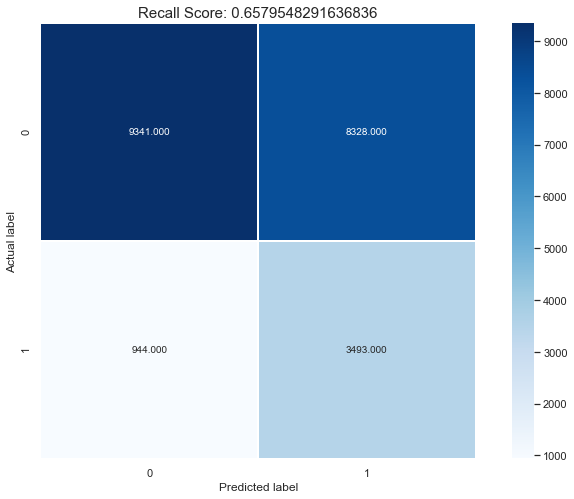

In [154]:
predictions, score = model_test(xgb, X_res, y_res)
get_model_performance(predictions, 'Blues')


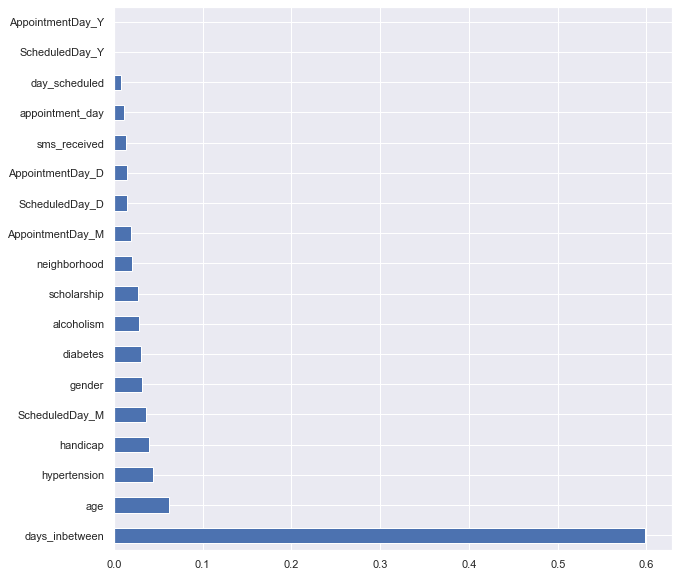

In [155]:
get_important_feats(xgb, X_res)

Confusion Matrix: 
 [[13227  4442]
 [ 2331  2106]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.85      0.75      0.80     17669
        Show       0.32      0.47      0.38      4437

    accuracy                           0.69     22106
   macro avg       0.59      0.61      0.59     22106
weighted avg       0.74      0.69      0.71     22106
 

True Negative: 13227
False Positive: 4442
False Negative: 2331
True Positive: 2106 

Precision score: 0.5858992338990765
Recall score: 0.6116221360177811
F1 score : 0.589795851131975
Accuracy score: 0.6936125938659188


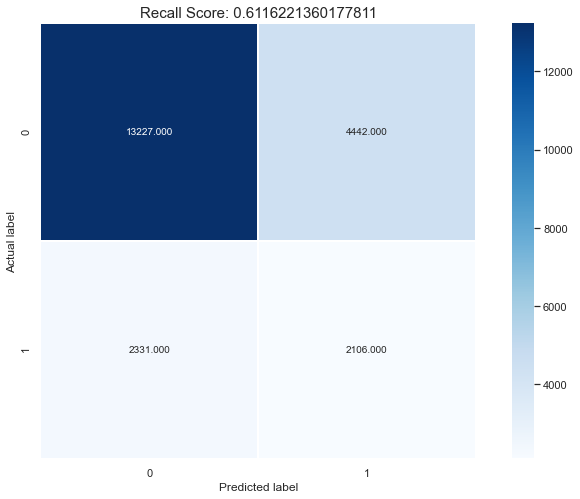

In [156]:
predictions, score = model_test(decision, X_res, y_res)
get_model_performance(predictions, 'Blues')


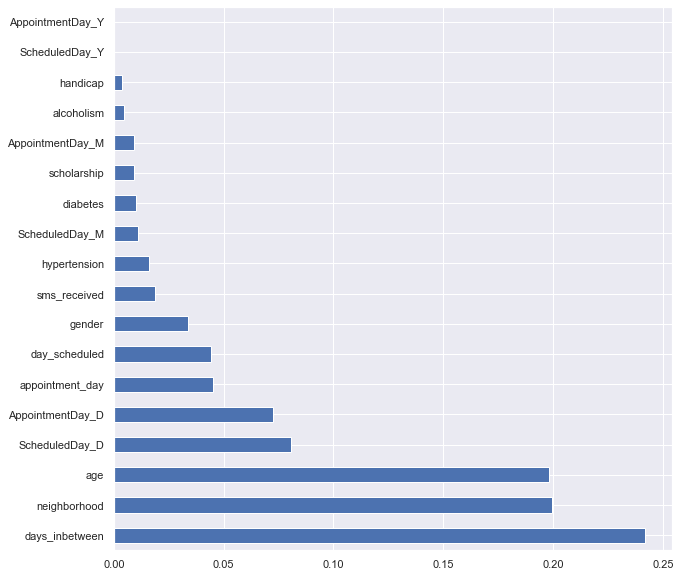

In [157]:
get_important_feats(decision, X_res)

Confusion Matrix: 
 [[14181  3488]
 [ 2634  1803]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.84      0.80      0.82     17669
        Show       0.34      0.41      0.37      4437

    accuracy                           0.72     22106
   macro avg       0.59      0.60      0.60     22106
weighted avg       0.74      0.72      0.73     22106
 

True Negative: 14181
False Positive: 3488
False Negative: 2634
True Positive: 1803 

Precision score: 0.5920607444247051
Recall score: 0.6044738780912666
F1 score : 0.5965754784636963
Accuracy score: 0.7230616122319732


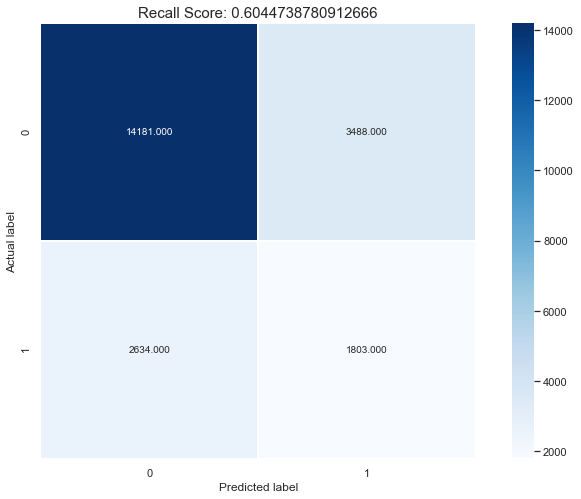

In [158]:
predictions, score = model_test(forest, X_res, y_res)
get_model_performance(predictions, 'Blues')


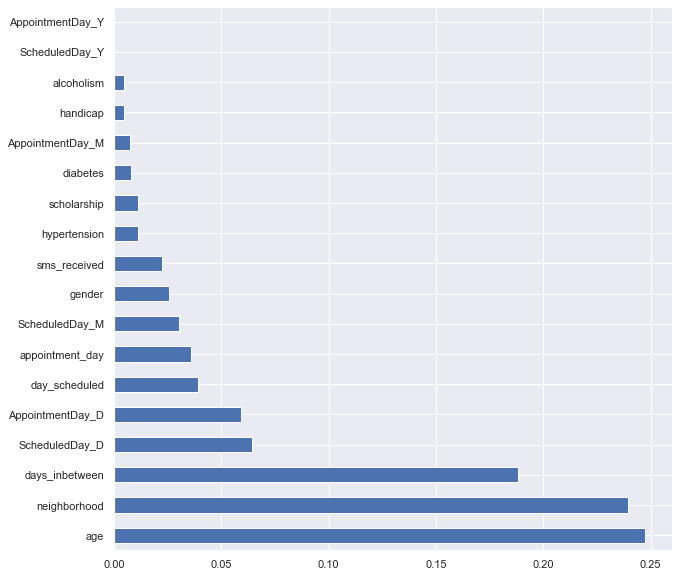

In [159]:
get_important_feats(forest, X_res)

Confusion Matrix: 
 [[9464 8205]
 [ 976 3461]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.91      0.54      0.67     17669
        Show       0.30      0.78      0.43      4437

    accuracy                           0.58     22106
   macro avg       0.60      0.66      0.55     22106
weighted avg       0.78      0.58      0.62     22106
 

True Negative: 9464
False Positive: 8205
False Negative: 976
True Positive: 3461 

Precision score: 0.6015937528121476
Recall score: 0.6578294614105147
F1 score : 0.5516182118259052
Accuracy score: 0.5846828915226635


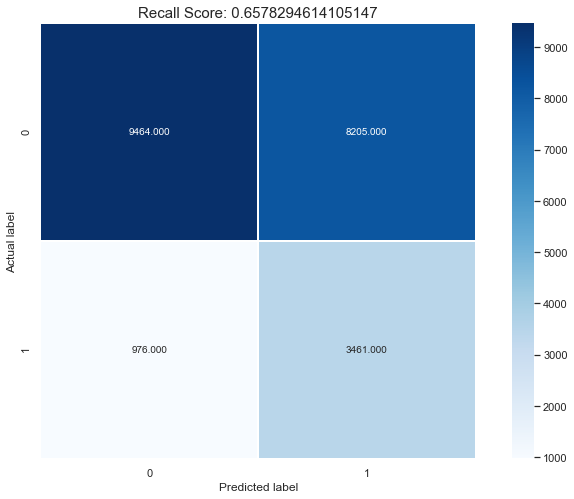

In [160]:
predictions, score = model_test(gbc, X_res, y_res)
get_model_performance(predictions, 'Blues')


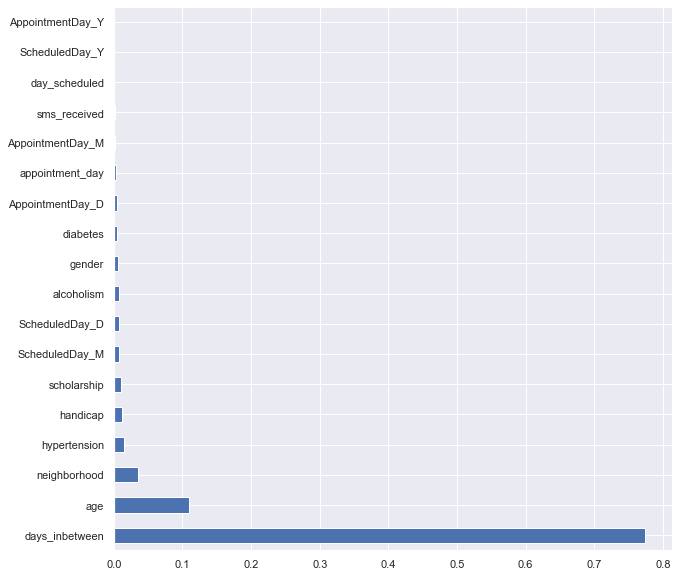

In [161]:
get_important_feats(gbc, X_res)

Confusion Matrix: 
 [[12198  5471]
 [ 2003  2434]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.86      0.69      0.77     17669
        Show       0.31      0.55      0.39      4437

    accuracy                           0.66     22106
   macro avg       0.58      0.62      0.58     22106
weighted avg       0.75      0.66      0.69     22106
 

True Negative: 12198
False Positive: 5471
False Negative: 2003
True Positive: 2434 

Precision score: 0.5834299915895313
Recall score: 0.6194652515882775
F1 score : 0.5799551603685711
Accuracy score: 0.6619017461322718


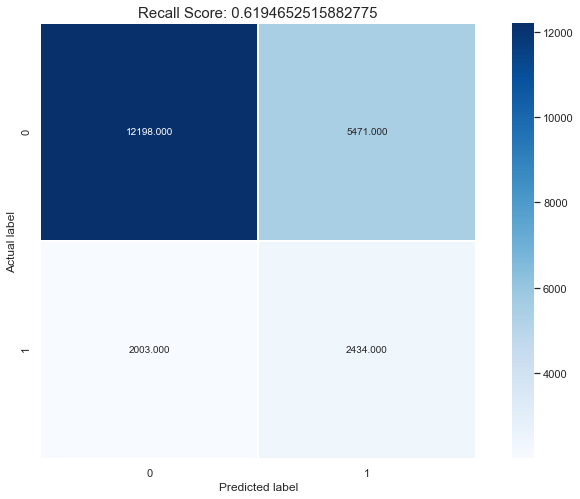

In [162]:
predictions, score = model_test(knn, X_res, y_res)
get_model_performance(predictions, 'Blues')


In [164]:
# get_important_feats(knn, X_res)
from sklearn.model_selection import RandomizedSearchCV

In [167]:
# Create XGB Classifier object
xgb_clf = XGBClassifier()#tree_method = "gpu_exact", 
#                     predictor = "gpu_predictor", 
#                            eval_metric = ["logloss", "auc"]), 
                        
#                             objective = "multi:softmax")
# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, 
                              scoring = ['recall', 'f1'],
                              refit = 'recall',
                             cv = 7, verbose = 3, random_state = 42,
                     return_train_score=True)

# Fit the model
model_xgboost = xgb_rscv.fit(X_res, y_res)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV] subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, f1=(train=0.739, test=0.693), recall=(train=0.857, test=0.779), total=  50.7s
[CV] subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   52.8s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, f1=(train=0.737, test=0.715), recall=(train=0.854, test=0.813), total=  51.0s
[CV] subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, f1=(train=0.733, test=0.740), recall=(train=0.852, test=0.860), total=  51.3s
[CV] subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, f1=(train=0.733, test=0.739), recall=(train=0.850, test=0.863), total=  51.2s
[CV] subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, f1=(train=0.733, test=0.745), recall=(train=0.854, test=0.873), total=  50.2

[CV]  subsample=0.6, reg_lambda=2, reg_alpha=1, n_estimators=250, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=1, colsample_bytree=1.0, f1=(train=0.736, test=0.737), recall=(train=0.910, test=0.914), total=  20.7s
[CV] subsample=0.6, reg_lambda=2, reg_alpha=1, n_estimators=250, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=2, reg_alpha=1, n_estimators=250, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=1, colsample_bytree=1.0, f1=(train=0.735, test=0.740), recall=(train=0.909, test=0.916), total=  20.7s
[CV] subsample=0.6, reg_lambda=2, reg_alpha=1, n_estimators=250, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=2, reg_alpha=1, n_estimators=250, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=1, colsample_bytree=1.0, f1=(train=0.735, test=0.730), recall=(train=0.899, test=0.896), total=  20.7s
[CV] subsample=0.6

[CV]  subsample=0.6, reg_lambda=3, reg_alpha=0, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.01, colsample_bytree=0.6, f1=(train=0.780, test=0.781), recall=(train=0.870, test=0.885), total= 2.0min
[CV] subsample=0.6, reg_lambda=3, reg_alpha=0, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.01, colsample_bytree=0.6 
[CV]  subsample=0.6, reg_lambda=3, reg_alpha=0, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.01, colsample_bytree=0.6, f1=(train=0.782, test=0.772), recall=(train=0.872, test=0.879), total= 2.0min
[CV] subsample=0.6, reg_lambda=3, reg_alpha=0, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.01, colsample_bytree=0.6 
[CV]  subsample=0.6, reg_lambda=3, reg_alpha=0, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.01, colsample_bytree=0.6, f1=(train=0.781, test=0.780), recall=(train=0.871, test=0.887), total= 2.3mi

[CV]  subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, f1=(train=0.767, test=0.764), recall=(train=0.859, test=0.873), total= 2.8min
[CV] subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, f1=(train=0.765, test=0.770), recall=(train=0.857, test=0.877), total= 2.8min


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed: 146.4min finished


In [168]:
print(model_xgboost.best_score_)
print(model_xgboost.best_params_)

0.9019833000184294
{'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 250, 'min_child_weight': 7, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 1.0}


In [ ]:
# sm = SMOTE(random_state = 42) 
# X_train, y_train = sm.fit_sample(X_train, y_train) 
  
# print(f'After OverSampling, the shape of train_X: {X_train.shape}') 
# print(f'After OverSampling, the shape of train_y: {y_train.shape} \n') 
 
# # print(f'After OverSampling, counts of label 2 : {sum(y_train == 2)}')     
# print(f'After OverSampling, counts of label 1 : {sum(y_train == 1)}') 
# print(f'After OverSampling, counts of label 0 : {sum(y_train == 0)}') 

In [171]:
# preds = model_xgboost.predict(X_test)

In [ ]:
# best_preds = np.asarray([np.argmax(line) for line in preds])

# print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
# print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
# print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))


In [173]:
params = {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 1, 
 'n_estimators': 250, 
 'min_child_weight': 7, 
 'max_depth': 2, 'learning_rate': 0.01, 
 'gamma': 1, 'colsample_bytree': 1.0}

In [181]:
xgb_model = XGBClassifier(**params, objective='binary:logitraw')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[17669     0]
 [ 4437     0]]


Confusion Matrix: 
 [[7782 9887]
 [ 480 3957]] 

Classification Report: 
               precision    recall  f1-score   support

     No Show       0.94      0.44      0.60     17669
        Show       0.29      0.89      0.43      4437

    accuracy                           0.53     22106
   macro avg       0.61      0.67      0.52     22106
weighted avg       0.81      0.53      0.57     22106
 

True Negative: 7782
False Positive: 9887
False Negative: 480
True Positive: 3957 

Precision score: 0.6138652412177859
Recall score: 0.6661255961027154
F1 score : 0.5165583645881802
Accuracy score: 0.5310322989233692


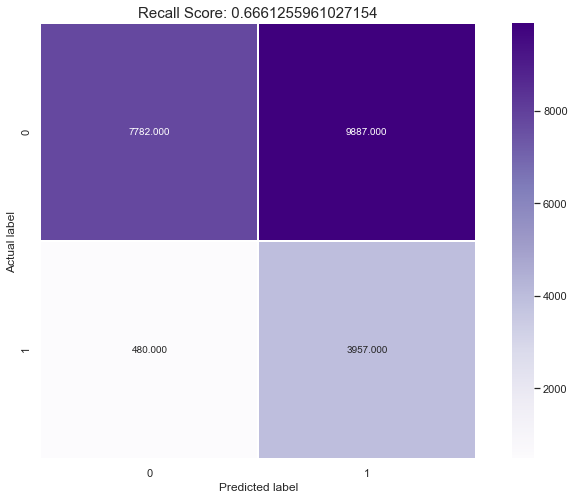

In [183]:
get_model_performance(preds, 'Purples')

In [182]:
preds = model_xgboost.predict(X_test)